<h1>Facial Landmark Detection in Python with OpenCV</h1>
<br>
<b>Welcome!</b>

<a id="top"></a>
<h2>Table of Contents</h2>
<ul>
    <li><a href="#00">Import Packages</a></li>
    <li><a href="#01">Retrieve Image</a></li>
    <li><a href="#02">Image Processing</a></li>
    <li><a href="#03">Face Detection</a></li>
    <li><a href="#04">Facial Landmarks Detection</a></li>
    <li><a href="#05">Credits</a></li>
</ul>

<b> Used openCV 4.1.2 and Python 3.7</b>

<a id="00"></a>

## Import Packages

<br><a href="#top" style="text-align:left;">Back to Top</a>

#### Import the OpenCV package

In [1]:
import cv2
print(cv2.__version__)

4.7.0


#### Import other required packages

In [2]:
# used for accessing url to download files
import urllib.request as urlreq

# used to access local directory
import os

# used to plot our images
import matplotlib.pyplot as plt

# used to change image size
from pylab import rcParams

<a id="01"></a>
## Retrieve Image

<br><a href="#top" style="text-align:left;">Back to Top</a>

#### Download an image

In [3]:

# save picture's name as pic
pic = "a.jpg"

# chech if picture is in working directory

#### Display downloaded image

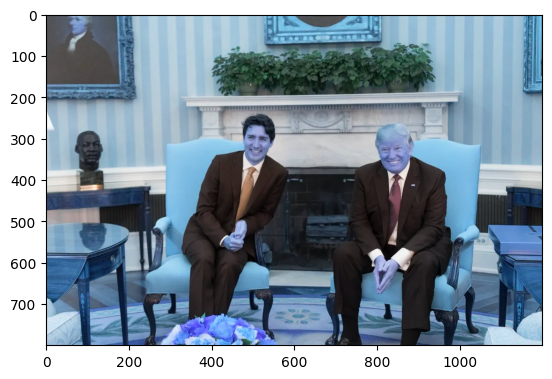

In [4]:
# read image with openCV
image = cv2.imread(pic)

# plot image with matplotlib package
plt.imshow(image)

<a id="02"></a>
## Image Processing

<br><a href="#top" style="text-align:left;">Back to Top</a>

#### Fix image colours

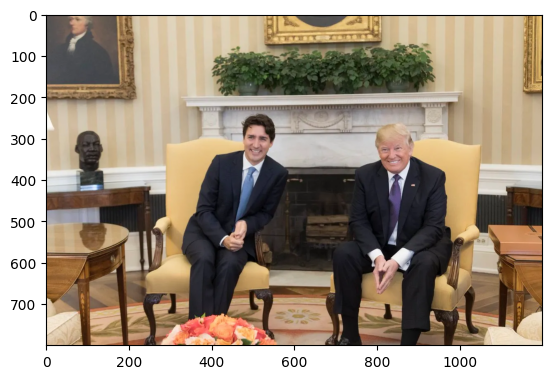

In [5]:
# convert image to RGB colour
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# plot image with matplotlib package
plt.imshow(image_rgb)

#### Crop Image

``Crop image to a specific size using the image's axes, with top-left of the image being (0,0). 
Use image[y:y+depth, x:x+width],
where x and y are the left-hand-side axes to start the cropping.
Width and depth are the x and y dimensions for the cropped image respectively.``


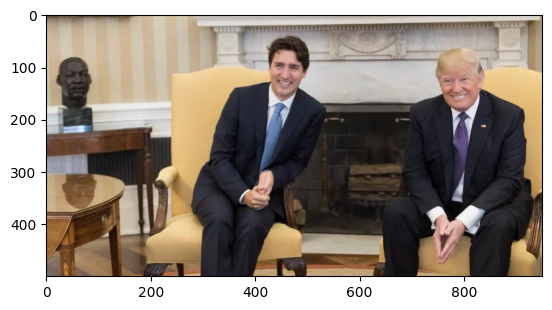

In [6]:
# set dimension for cropping image
x, y, width, depth = 50, 200, 950, 500
image_cropped = image_rgb[y:(y+depth), x:(x+width)]

# create a copy of the cropped image to be used later
image_template = image_cropped.copy()

# show image
plt.imshow(image_cropped)

#### Image Zoom In

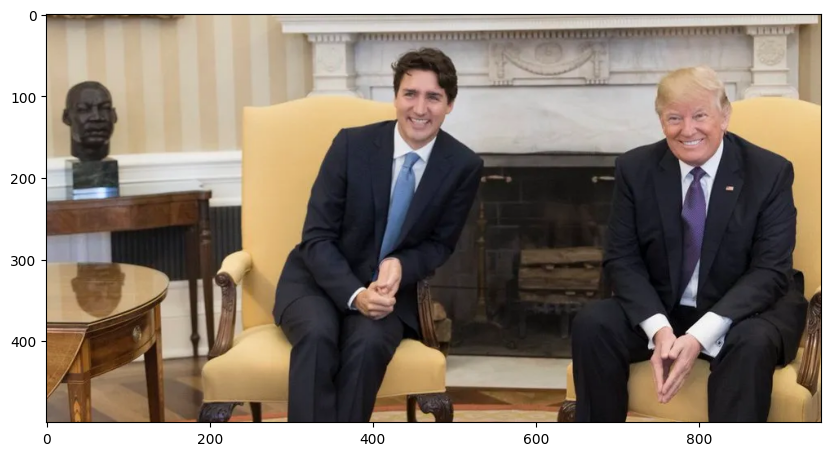

In [7]:
# Set zooming parameters
rcParams['figure.figsize'] = 10, 12
plt.imshow(image_cropped)

#### Remove the displayed axes

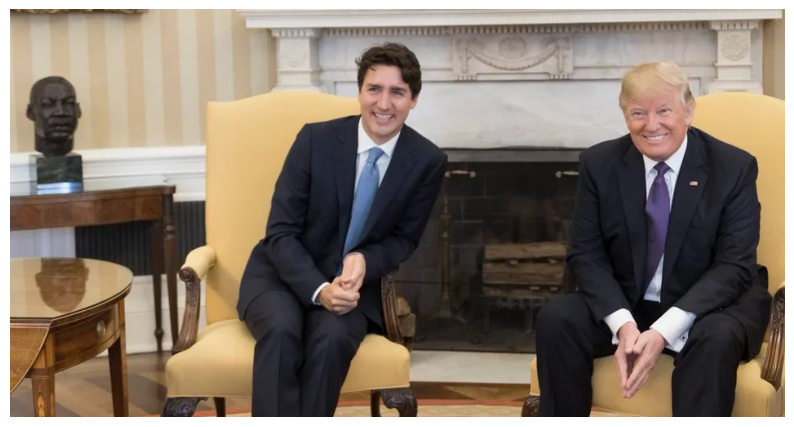

In [8]:
plt.axis("off")
plt.imshow(image_cropped)

#### Convert image to GrayScale

Note: Face detection algorithm used here performs better with grayscale images 

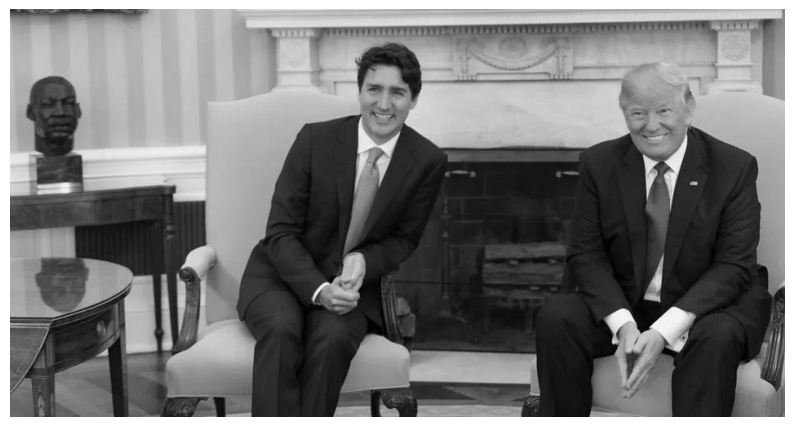

In [9]:
# convert image to Grayscale
image_gray = cv2.cvtColor(image_cropped, cv2.COLOR_BGR2GRAY)

# remove axes
plt.axis("off")
plt.imshow(image_gray, cmap = "gray")

<a id="03"></a>
## Face Detection

<br><a href="#top" style="text-align:left;">Back to Top</a>

#### Download face detection algorithm

In [10]:
# save face detection algorithm's url in haarcascade_url variable
haarcascade_url = "https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_alt2.xml"

# save face detection algorithm's name as haarcascade
haarcascade = "haarcascade_frontalface_alt2.xml"

# chech if file is in working directory
if (haarcascade in os.listdir(os.curdir)):
    print("File exists")
else:
    # download file from url and save locally as haarcascade_frontalface_alt2.xml
    urlreq.urlretrieve(haarcascade_url, haarcascade)
    print("File downloaded")

File exists


#### Detect Faces

In [11]:
# create an instance of the Face Detection Cascade Classifier
detector = cv2.CascadeClassifier(haarcascade)

# Detect faces using the haarcascade classifier on the "grayscale image"
faces = detector.detectMultiScale(image_gray)

# Print coordinates of detected faces
print("Faces:\n", faces)

Faces:
 [[ 29  92  63  63]
 [423  71  75  75]
 [746  98  74  74]]


#### Display Detected Faces

Text(0.5, 1.0, 'Face Detection')

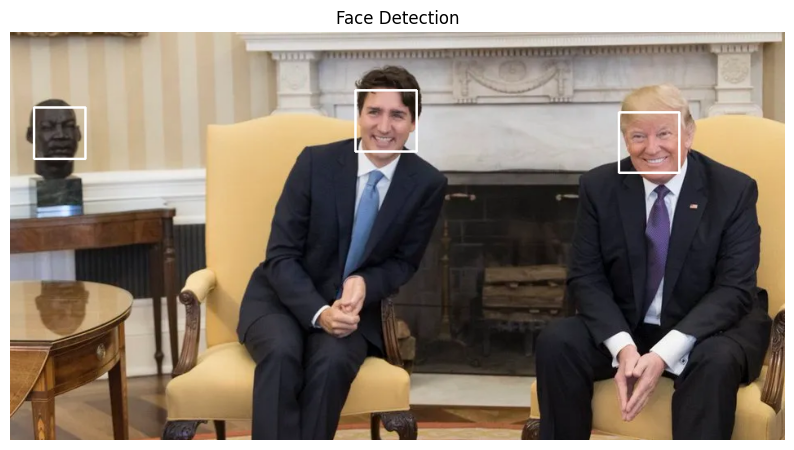

In [12]:
for face in faces:
#     save the coordinates in x, y, w, d variables
    (x,y,w,d) = face
    # Draw a white coloured rectangle around each face using the face's coordinates
    # on the "image_template" with the thickness of 2 
    cv2.rectangle(image_template,(x,y),(x+w, y+d),(255, 255, 255), 2)

plt.axis("off")
plt.imshow(image_template)
plt.title('Face Detection')

<a id="04"></a>
## Facial Landmarks Detection

<br><a href="#top" style="text-align:left;">Back to Top</a>

#### Download Facial Landmark Detection Models

In [13]:
# save facial landmark detection model's url in LBFmodel_url variable
LBFmodel_url = "https://github.com/kurnianggoro/GSOC2017/raw/master/data/lbfmodel.yaml"

# save facial landmark detection model's name as LBFmodel
LBFmodel = "LFBmodel.yaml"

# check if file is in working directory
if (LBFmodel in os.listdir(os.curdir)):
    print("File exists")
else:
    # download picture from url and save locally as lbfmodel.yaml
    urlreq.urlretrieve(LBFmodel_url, LBFmodel)
    print("File downloaded")

File exists


#### Get facial landmarks

In [14]:
# create an instance of the Facial landmark Detector with the model

landmark_detector  = cv2.face.createFacemarkLBF()
landmark_detector.loadModel(LBFmodel)

# Detect landmarks on "image_gray"
_, landmarks = landmark_detector.fit(image_gray, faces)

# print coordinates of detected landmarks
print("landmarks LBF\n", landmarks)

loading data from : LFBmodel.yaml
landmarks LBF
 (array([[[ 26.849035, 118.84709 ],
        [ 27.695545, 126.70118 ],
        [ 28.956087, 134.24107 ],
        [ 31.485062, 141.6514  ],
        [ 35.703293, 148.24197 ],
        [ 41.38605 , 153.6953  ],
        [ 47.726166, 157.88779 ],
        [ 54.857956, 160.74931 ],
        [ 62.071068, 160.50977 ],
        [ 68.029655, 158.7942  ],
        [ 72.502075, 154.50691 ],
        [ 76.678795, 148.89975 ],
        [ 79.92481 , 142.29869 ],
        [ 82.10393 , 135.29924 ],
        [ 83.4087  , 128.45944 ],
        [ 83.392   , 121.54918 ],
        [ 82.78369 , 114.94919 ],
        [ 34.966686, 112.687225],
        [ 39.27818 , 109.08892 ],
        [ 45.24327 , 107.7039  ],
        [ 51.42059 , 108.111916],
        [ 57.513615, 109.90594 ],
        [ 63.607296, 109.83334 ],
        [ 68.3255  , 107.8151  ],
        [ 73.52041 , 106.478485],
        [ 78.619736, 106.545044],
        [ 81.65091 , 109.941055],
        [ 60.924507, 114.89094 ]

#### Display Landmarks

In [15]:
numara = 1

for landmark in landmarks:
    for x, y in landmark[0]:
        # Daireyi çiz
        #cv2.circle(image_cropped, (int(x), int(y)), 1, (0, 0, 0), 1)
        
        # Numarayı ekle
        cv2.putText(image_cropped, str(numara), (int(x) , int(y)), cv2.FONT_HERSHEY_SIMPLEX, 0.2, (0, 255, 0), 1, cv2.LINE_AA)
        
        # Numarayı bir arttır
        numara += 1

#### Zoom in to each landmarks

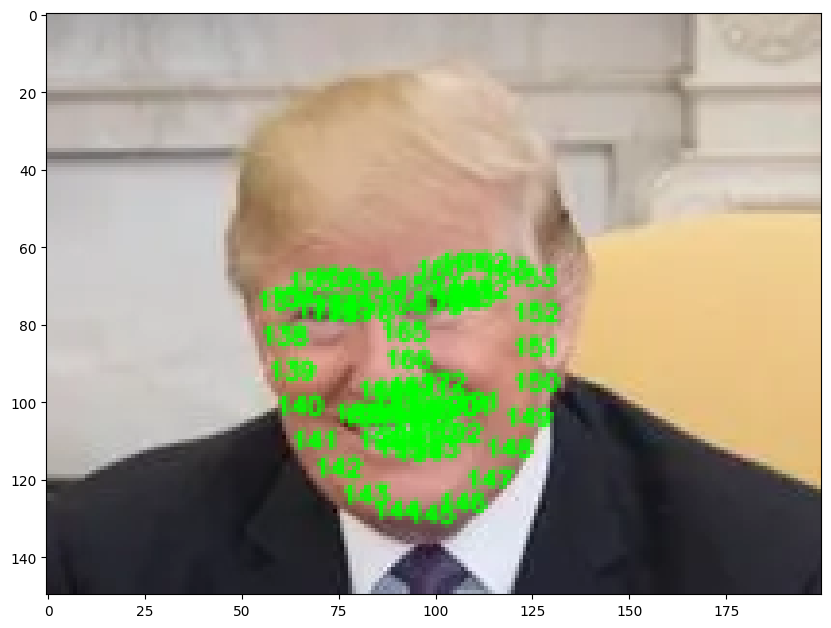

In [16]:
# set cropped image
x, y, width, depth = 700, 50, 200, 150
image_cropped3 = image_cropped[y:(y+depth), x:(x+width)]

plt.imshow(image_cropped3)

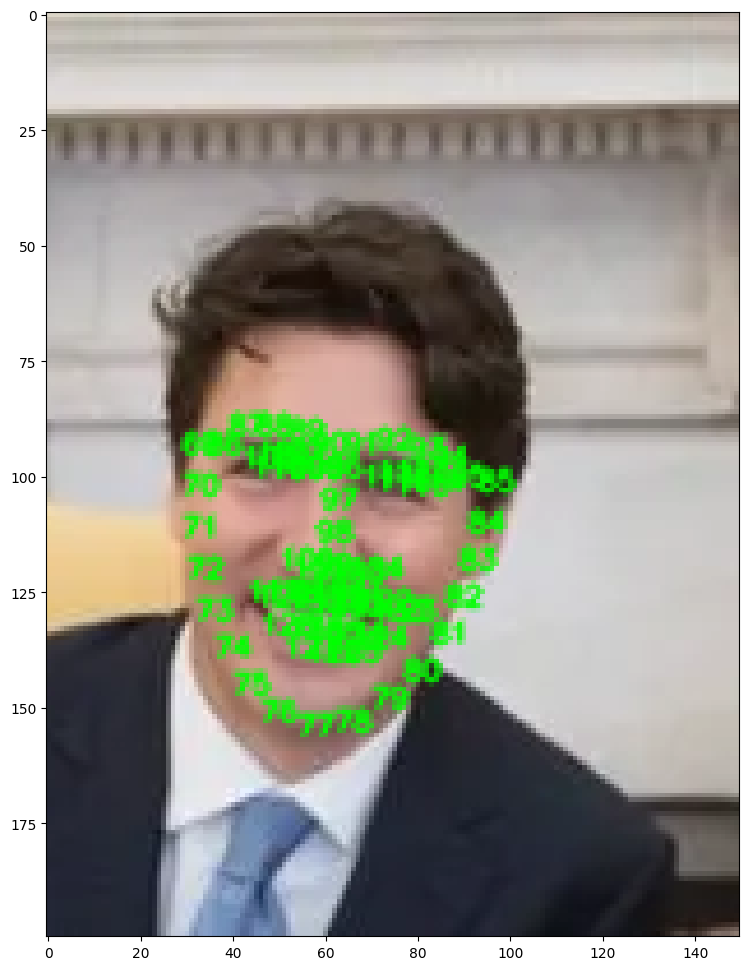

In [17]:
# set cropped image
x, y, width, depth = 400, 0, 150, 200
image_cropped2 = image_cropped[y:(y+depth), x:(x+width)]

plt.imshow(image_cropped2)

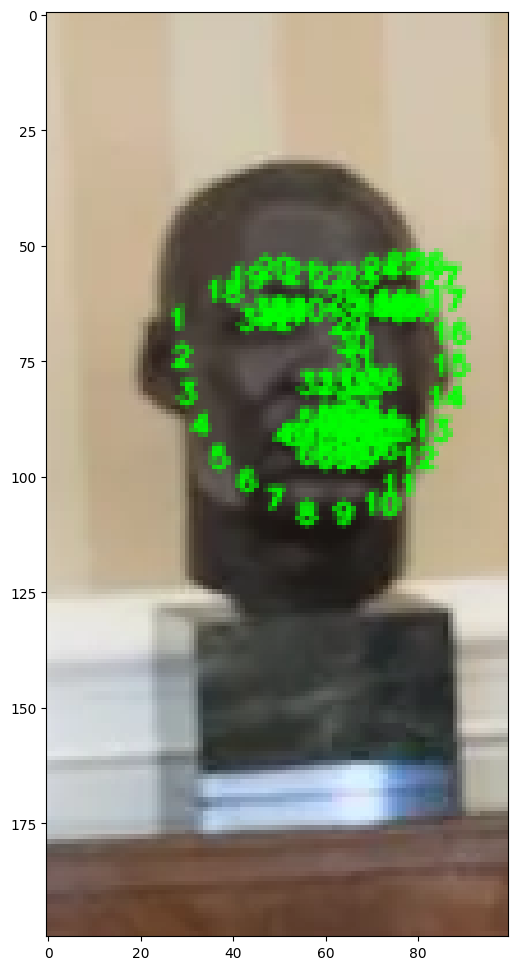

In [18]:
# set cropped image
x, y, width, depth = 0, 50, 100, 200
image_cropped1 = image_cropped[y:(y+depth), x:(x+width)]

plt.imshow(image_cropped1)

<a id="05"></a>
## Credits

<br><a href="#top" style="text-align:left;">Back to Top</a>

https://github.com/kurnianggoro/GSOC2017

https://github.com/sacchitchadha

https://github.com/albertofernandezvillan

https://github.com/tensorflowlagos